                                                   CIFAR-RESNET WITH DATA AUGMENTAION                                                                                 

Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load the Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

RESNET Block

In [3]:
def residual_block(x, filters, downsample=False):
    identity = x
    stride = 2 if downsample else 1

    # First convolution
    x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second convolution
    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection
    if downsample:
        identity = layers.Conv2D(filters, (1, 1), strides=2, padding='same')(identity)
        identity = layers.BatchNormalization()(identity)

    # Add skip connection
    x = layers.add([x, identity])
    x = layers.ReLU()(x)
    return x

Build the ResNet model

In [9]:
# Build the ResNet model using Functional API
inputs = Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3), strides=1, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# Residual blocks
x = residual_block(x, 64)
x = residual_block(x, 128, downsample=True)
x = residual_block(x, 256, downsample=True)

# Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)

# Fully connected dense layer
x = layers.Dense(64, activation='relu')(x)

# Output layer
outputs = layers.Dense(10, activation='softmax')(x)

# Final model
model = models.Model(inputs=inputs, outputs=outputs)



Compile the model

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

DATA AUGMENTATION

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)


Set up EarlyStopping to avoid overfitting

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Train the model with data augmentation and early stopping

In [8]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),epochs=10,validation_data=(X_test, y_test),callbacks=[early_stopping])

c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 293s 185ms/step - accuracy: 0.3951 - loss: 1.6529 - val_accuracy: 0.4220 - val_loss: 1.7163
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 173ms/step - accuracy: 0.6117 - loss: 1.0859 - val_accuracy: 0.4108 - val_loss: 2.0014
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1226s 785ms/step - accuracy: 0.6823 - loss: 0.8980 - val_accuracy: 0.6584 - val_loss: 1.0253
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 266s 170ms/step - accuracy: 0.7236 - loss: 0.7838 - val_accuracy: 0.7089 - val_loss: 0.8613
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 320s 205ms/step - accuracy: 0.7604 - loss: 0.6822 - val_accuracy: 0.7535 - val_loss: 0.7200
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 171ms/step - accuracy: 0.7848 - loss: 0.6246 - val_accuracy: 0.6984 - val_loss: 0.9383
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 169ms/step - accuracy: 0.8022 - loss: 0.5719 - val_accuracy: 0.7538 - val_loss: 0.7345
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 271s 173ms/step - a

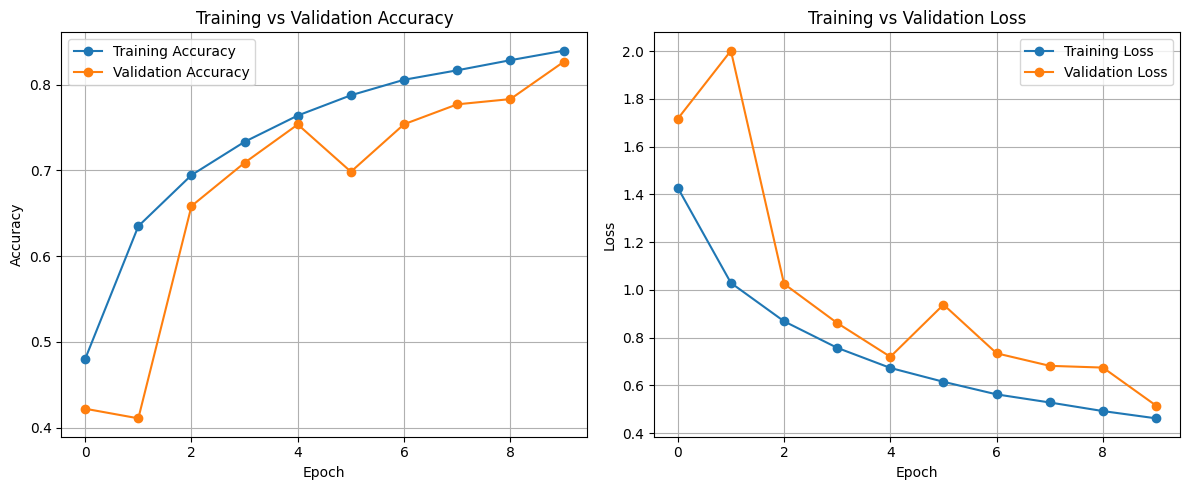

In [ ]:
# Plotting Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
